In [80]:
import pandas as pd
import numpy as np
from sympy import primerange, gcd
from sympy.ntheory import prime
import math
import matplotlib.pyplot as plt
from numba import njit

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)


Condition 4.1
$$b_2^4\cdot q=a^2+p\cdot b_1^4$$

In [88]:
def condition_41(p, q, b1_max=100, b2_max=100):
    """
    Optimized function to check if there exists integers a, b1, b2 that satisfy:
    b2^4 * q = a^2 + p * b1^4 and gcd(a, b1 * b2) = 1.
    
    Returns:
    - (1, a, b1, b2) if the condition is fulfilled
    - (0, NaN, NaN, NaN) otherwise
    """
    p = int(p)
    q = int(q)
    for b1 in range(1, b1_max + 1):
        b1_4 = b1**4  # Precompute b1^4
        for b2 in range(1, b2_max + 1):
            b2_4_q = b2**4 * q  # Precompute b2^4 * q
            rhs = b2_4_q - p * b1_4
            
            # Only check further if rhs is a non-negative perfect square
            if rhs >= 0:
                a_sq = rhs
                a = int(math.isqrt(a_sq))
                
                # Verify if a is a solution and gcd(a, b1 * b2) = 1
                if a * a == a_sq and gcd(a, b1 * b2) == 1:
                    return (1, a, b1, b2)
    
    return (0, np.nan, np.nan, np.nan)

@njit
def condition_41_numba(p, q, b1_max=50, b2_max=50):
    for b1 in range(1, b1_max + 1):
        b1_4 = b1**4
        for b2 in range(1, b2_max + 1):
            b2_4_q = b2**4 * q
            rhs = b2_4_q - p * b1_4
            if rhs >= 0:
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)


Condition 4.2
$$b_2^4\cdot p\cdot q=a^2+b_1^4$$

In [89]:
def condition_42(p, q, b1_max=100, b2_max=100):
    """
    Check if there exists integers a, b1, b2 that satisfy:
    b2^4 * p * q = a^2 + b1^4 and gcd(a, b1 * b2) = 1.
    
    Returns:
    - (1, a, b1, b2) if the condition is fulfilled
    - (0, NaN, NaN, NaN) otherwise
    """
    p = int(p)
    q = int(q)
    for b1 in range(1, b1_max + 1):
        b1_4 = b1**4  # Precompute b1^4
        for b2 in range(1, b2_max + 1):
            b2_4_pq = b2**4 * p * q  # Precompute b2^4 * p * q
            rhs = b2_4_pq - b1_4
            
            # Only check further if rhs is a non-negative perfect square
            if rhs >= 0:
                a_sq = rhs
                a = int(math.isqrt(a_sq))
                
                # Verify if a is a solution and gcd(a, b1 * b2) = 1
                if a * a == a_sq and gcd(a, b1 * b2) == 1:
                    return (1, a, b1, b2)
    
    return (0, np.nan, np.nan, np.nan)

@njit
def condition_42_numba(p, q, b1_max=50, b2_max=50):
    for b1 in range(1, b1_max + 1):
        b1_4 = b1**4
        for b2 in range(1, b2_max + 1):
            b2_4_pq = b2**4 * p * q
            rhs = b2_4_pq - b1_4
            if rhs >= 0:
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)

Condition 4.3
$$b_2^4\cdot q=p\cdot b_1^4-a^2$$

In [90]:
def condition_43(p, q, b1_max=100, b2_max=100):
    """
    Check if there exists integers a, b1, b2 that satisfy:
    b2^4 * q = p * b1^4 - a^2.
    
    Returns:
    - (1, a, b1, b2) if the condition is fulfilled
    - (0, NaN, NaN, NaN) otherwise
    """
    p, q = int(p), int(q)
    for b1 in range(1, b1_max + 1):
        b1_4 = b1**4  # Precompute b1^4
        for b2 in range(1, b2_max + 1):
            b2_4_q = b2**4 * q  # Precompute b2^4 * q
            rhs = p * b1_4 - b2_4_q
            
            # Only check further if rhs is a non-negative perfect square
            if rhs >= 0:
                a = int(math.isqrt(rhs))
                
                # Verify if a^2 equals rhs
                if a * a == rhs:
                    return (1, a, b1, b2)
    
    return (0, np.nan, np.nan, np.nan)

@njit
def condition_43_numba(p, q, b1_max=50, b2_max=50):
    for b1 in range(1, b1_max + 1):
        b1_4 = b1**4
        for b2 in range(1, b2_max + 1):
            b2_4_q = b2**4 * q
            rhs = p * b1_4 - b2_4_q
            if rhs >= 0:
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)

Condition 4.4
$$b_2^4\cdot p\cdot q=b_1^4-a^2$$

In [91]:
def condition_44(p, q, b1_max=100, b2_max=100):
    """
    Check if there exists integers a, b1, b2 that satisfy:
    b2^4 * p * q = b1^4 - a^2.
    
    Returns:
    - (1, a, b1, b2) if the condition is fulfilled
    - (0, NaN, NaN, NaN) otherwise
    """
    p, q = int(p), int(q)
    for b1 in range(1, b1_max + 1):
        b1_4 = b1**4  # Precompute b1^4
        for b2 in range(1, b2_max + 1):
            b2_4_pq = b2**4 * p * q  # Precompute b2^4 * p * q
            rhs = b1_4 - b2_4_pq
            
            # Only check further if rhs is a non-negative perfect square
            if rhs >= 0:
                a = int(math.isqrt(rhs))
                
                # Verify if a^2 equals rhs
                if a * a == rhs:
                    return (1, a, b1, b2)
    
    return (0, np.nan, np.nan, np.nan)

@njit
def condition_44_numba(p, q, b1_max=50, b2_max=50):
    for b1 in range(1, b1_max + 1):
        b1_4 = b1**4
        for b2 in range(1, b2_max + 1):
            b2_4_pq = b2**4 * p * q
            rhs = b1_4 - b2_4_pq
            if rhs >= 0:
                # Use np.sqrt for compatibility with Numba
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)

Create a DataFrame with pairs of odd primes, where each row represents a unique pair $(𝑝,q)$ with $𝑝<𝑞$.

In [108]:
primes = primerange(3, 6000) #7000
prime_list=list(primes)
#prime_list.reverse()
l = len(prime_list)

p_values = []
q_values = []
for i in range(len(prime_list)):
    for j in range(i + 1, l):
        p_values.append(prime_list[i])
        q_values.append(prime_list[j])

df_primes = pd.DataFrame({"p": p_values, "q": q_values}, dtype=np.int32)

In [109]:
df_primes[['condition_41', 'condition_41_a', 'condition_41_b1', 'condition_41_b2']] = df_primes.apply(lambda row: pd.Series(condition_41_numba(row['p'], row['q'])), axis=1)
df_primes['condition_41'] = df_primes['condition_41'].astype(np.int8)
df_primes[['condition_41_a', 'condition_41_b1', 'condition_41_b2']] = df_primes[['condition_41_a', 'condition_41_b1', 'condition_41_b2']].astype(pd.Int32Dtype())

In [110]:
df_primes[['condition_42', 'condition_42_a', 'condition_42_b1', 'condition_42_b2']] = df_primes.apply(lambda row: pd.Series(condition_42_numba(row['p'], row['q'])), axis=1)
df_primes['condition_42'] = df_primes['condition_42'].astype(np.int8)
df_primes[['condition_42_a', 'condition_42_b1', 'condition_42_b2']] = df_primes[['condition_42_a', 'condition_42_b1', 'condition_42_b2']].astype(pd.Int32Dtype())

In [111]:
df_primes[['condition_43', 'condition_43_a', 'condition_43_b1', 'condition_43_b2']] = df_primes.apply(lambda row: pd.Series(condition_43_numba(row['p'], row['q'])), axis=1)
df_primes['condition_43'] = df_primes['condition_43'].astype(np.int8)
df_primes[['condition_43_a', 'condition_43_b1', 'condition_43_b2']] = df_primes[['condition_43_a', 'condition_43_b1', 'condition_43_b2']].astype(pd.Int32Dtype())

In [112]:
df_primes[['condition_44', 'condition_44_a', 'condition_44_b1', 'condition_44_b2']] = df_primes.apply(lambda row: pd.Series(condition_44_numba(row['p'], row['q'])), axis=1)
df_primes['condition_44'] = df_primes['condition_44'].astype(np.int8)
df_primes[['condition_44_a', 'condition_44_b1', 'condition_44_b2']] = df_primes[['condition_44_a', 'condition_44_b1', 'condition_44_b2']].astype(pd.Int32Dtype())

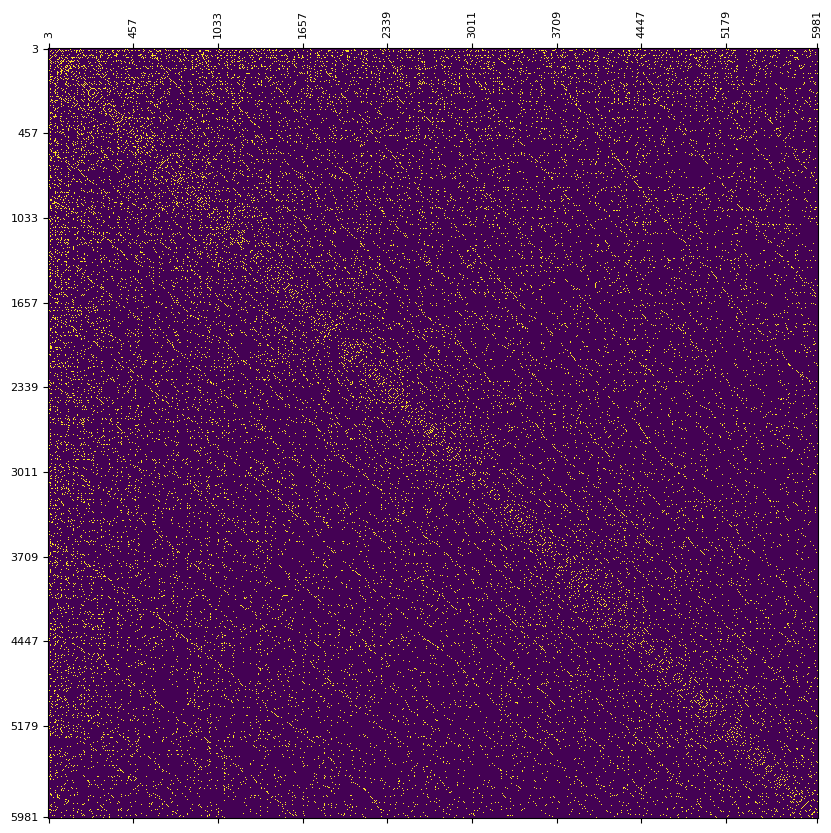

In [116]:
df_condition_met = df_primes[df_primes['condition_41'] == 1]

# Set up matrix indices for unique primes
# Combine unique values from 'p' and 'q' columns and sort them
# prime_index_map = {3: 0, 5: 1, 7: 2, 11: 3, 13: 4, 17: 5, 19: 6, 23: 7, 29: 8, ...}
unique_primes = sorted(set(df_primes['p'].unique()).union(set(df_primes['q'].unique())))
prime_index_map = {prime: idx for idx, prime in enumerate(unique_primes)}

# Initialize matrix with zeros
matrix_size = len(unique_primes)
matrix = np.zeros((matrix_size, matrix_size), dtype=int)

# Map indices
# p_indices = [  0   0   0 ... 159 161 161]
# q_indices = [  2   6  17 ... 164 162 164]
p_indices = df_condition_met['p'].map(prime_index_map).astype(int).to_numpy()
q_indices = df_condition_met['q'].map(prime_index_map).astype(int).to_numpy()

# Update matrix with valid indices only
matrix[p_indices, q_indices] = 1
matrix[q_indices, p_indices] = 1

# Generate thinned labels for axis
max_prime = max(unique_primes)
axis_labels = list(enumerate(primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]  # Thin labels
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

# Plot with thinned labels
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matrix, interpolation='nearest')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels, rotation=90, fontsize=8)
ax.set_yticklabels(ticklabels, fontsize=8)
plt.show()